# Загрузка данных

In [1]:
from pathlib import Path 
import pandas as pd 
import tarfile 
import urllib.request
import numpy as np

from sklearn.impute import SimpleImputer

In [2]:
def load_housing_data(): 
    tarball_path = Path("datasets/housing.tgz") 
    if not tarball_path.is_file(): 
        Path("datasets").mkdir(parents=True, exist_ok=True) 
        url = "https://github.com/ageron/data/raw/main/housing.tgz" 
        urllib.request.urlretrieve(url, tarball_path) 
        with tarfile.open(tarball_path) as housing_tarball: 
            housing_tarball.extractall(path="datasets") 
    return pd.read_csv(Path("datasets/housing/housing.csv")) 
 
housing = load_housing_data()

При load_housing_data() вызове он ищет файл datasets/housing.tgz. Если он не находит его, он создает каталог наборов данных внутри текущего каталога, загружает файл Housing.tgz из репозитория ageron/data GitHub и извлекает его содержимое в каталог наборов данных.  При этом создается каталог datasets / corporated с файлом Housing.csv внутри него. Наконец, функция загружает этот CSV-файл в объект Pandas DataFrame, содержащий все данные, и возвращает его. 

Посмотрим на данные и их структуру:

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing.isna().mean() #пропуски

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.010029
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

In [6]:
housing.ocean_proximity.value_counts() #категории

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Еще один быстрый способ получить представление о типе данных, с которыми вы имеете дело, — построить гистограмму для каждого числового атрибута:

In [8]:
import matplotlib.pyplot as plt

<Figure size 640x480 with 0 Axes>

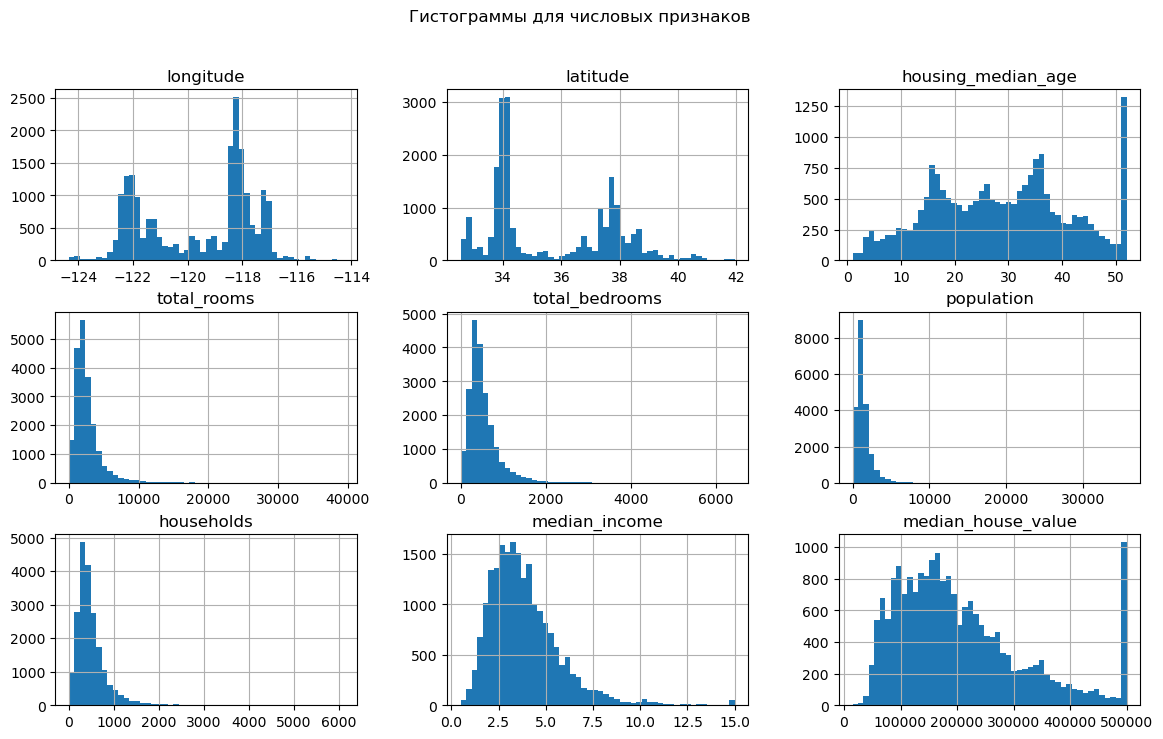

In [9]:
plt.figure()
housing.hist(bins=50, figsize=(14,8))
plt.suptitle("Гистограммы для числовых признаков")
plt.show()

# Анализ данных

Категории медианного дохода с помощью функции cut()

In [10]:
housing["income_cat"] = pd.cut(housing["median_income"], 
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf], 
                               labels=[1, 2, 3, 4, 5]) 

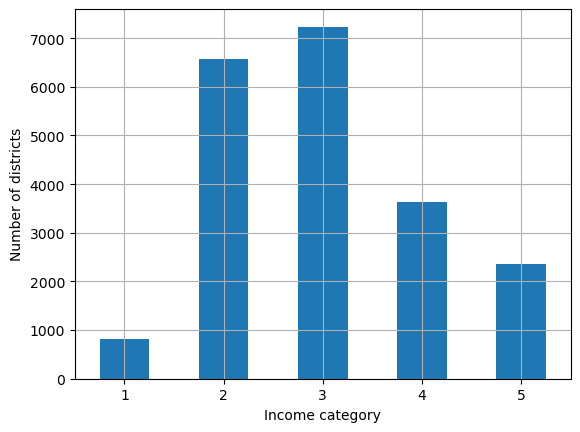

In [11]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True) 
plt.xlabel("Income category") 
plt.ylabel("Number of districts") 
plt.show() 

## Визуализация географических данных

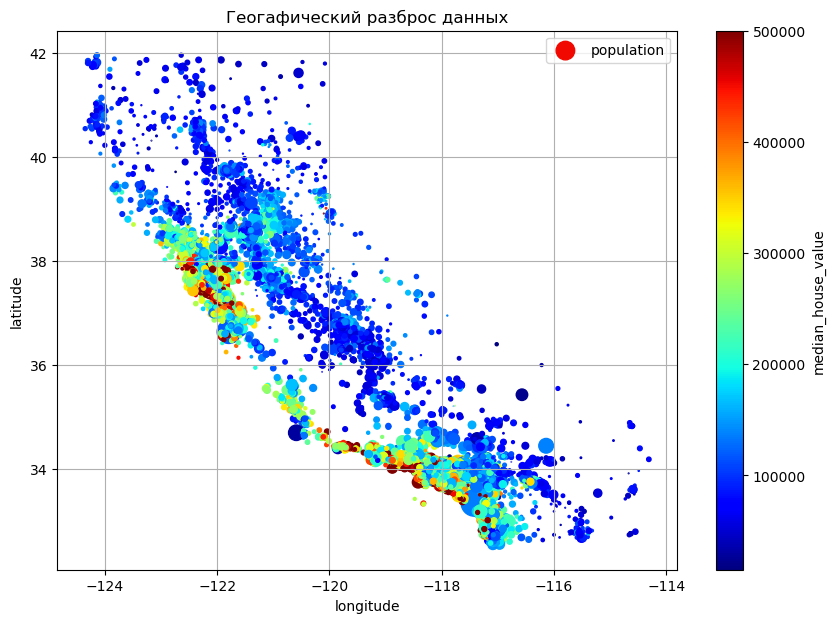

In [12]:
housing.plot(kind="scatter", x="longitude", y="latitude",  s=housing["population"] / 100, label="population", # s - размер кружков, кружки большего размера обозначают районы с большим населением 
             c="median_house_value", cmap="jet", colorbar=True, grid=True,
             legend=True, sharex=False, figsize=(10, 7)) # cmap - цветовая карта, где синий - низкие значения, красный - высокие значения
plt.title('Геогафический разброс данных')
plt.show() 

## Корреляция Пирсона

In [13]:
matrix_corr = housing.corr()
matrix_corr.median_house_value.sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

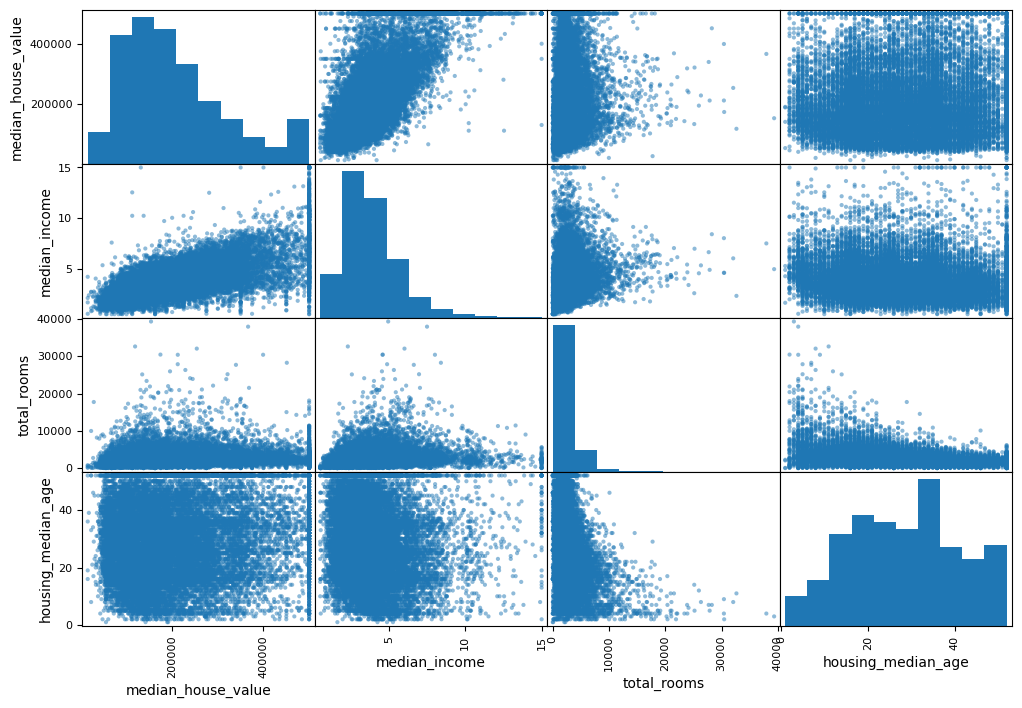

In [14]:
from pandas.plotting import scatter_matrix 
 
attributes = ["median_house_value", "median_income", "total_rooms", #посмотрим кореляцию только для части признаков
              "housing_median_age"] 
scatter_matrix(housing[attributes], figsize=(12, 8)) 
plt.show() 

Глядя на диаграммы рассеяния корреляции, кажется, что наиболее многообещающим атрибутом для прогнозирования средней стоимости дома является средний доход:

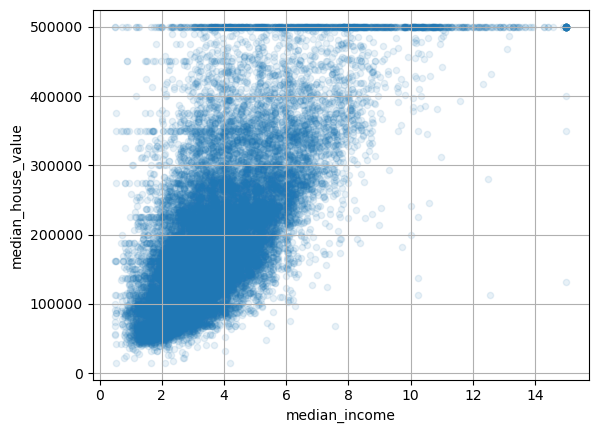

In [15]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", 
             alpha=0.1, grid=True) 
plt.show() 

## Добавляем признаки

Последнее, что вы, возможно, захотите сделать перед подготовкой данных для алгоритмов машинного обучения, — это попробовать различные комбинации атрибутов. Например, общее количество комнат в районе не очень полезно, если вы не знаете, сколько в нем домохозяйств. Что вам действительно нужно, так это количество комнат на домохозяйство. Точно так же общее количество спален само по себе не очень полезно: вы, вероятно, захотите сравнить его с количеством комнат. И численность населения на домохозяйство также кажется интересной комбинацией атрибутов для рассмотрения. Вы создаете эти новые атрибуты следующим образом: 

In [16]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"] 
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"] 
housing["people_per_house"] = housing["population"] / housing["households"] 

In [17]:
matrix_corr = housing.corr()
matrix_corr.median_house_value.sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
rooms_per_house       0.151948
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
people_per_house     -0.023737
population           -0.024650
longitude            -0.045967
latitude             -0.144160
bedrooms_ratio       -0.255880
Name: median_house_value, dtype: float64

# Подготовка данных для моделирования

In [18]:
from sklearn.model_selection import train_test_split

X = housing.drop('median_house_value', axis=1)
y = housing.median_house_value

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=housing['income_cat'])

In [19]:
X_train.drop('income_cat', axis=1, inplace=True)
X_test.drop('income_cat', axis=1, inplace=True)

## Заполнение пропусков с помощью Scikit-Learn

Заполним пропуски медианным значением. Поскольку медиану можно вычислить только для числовых атрибутов, необходимо создать копию данных только с числовыми атрибутами (при этом будет исключен текстовый атрибут ocean_proximity): 

In [20]:
housing = housing.drop(['median_house_value','income_cat'] , axis=1)

In [21]:
housing_num = housing.select_dtypes(include=[np.number]) 

Теперь подгоним imputer экземпляр к обучающим данным, используя fit() метод: 

In [22]:
imputer = SimpleImputer(strategy='median')
imputer.fit( housing_num)
imputer.statistics_

array([-1.18490000e+02,  3.42600000e+01,  2.90000000e+01,  2.12700000e+03,
        4.35000000e+02,  1.16600000e+03,  4.09000000e+02,  3.53480000e+00,
        5.22912879e+00,  2.03162434e-01,  2.81811565e+00])

In [23]:
housing_num.median().values

array([-1.18490000e+02,  3.42600000e+01,  2.90000000e+01,  2.12700000e+03,
        4.35000000e+02,  1.16600000e+03,  4.09000000e+02,  3.53480000e+00,
        5.22912879e+00,  2.03162434e-01,  2.81811565e+00])

безопаснее применить imputer ко всем числовым атрибутам, так в будущем если в новых признаках появятся пропуски они будут заполнены автоматически.

Теперь можно использовать это «обученное» imputer для преобразования обучающего набора, заменив отсутствующие значения изученными медианами: 

In [24]:
X = imputer.transform(housing_num)

Отсутствующие значения также можно заменить средним значением (strategy="mean"), или наиболее часто встречающимся значением (strategy="most_frequent"), или постоянным значением (strategy="constant", fill_value=… ). Последние две стратегии поддерживают нечисловые данные. 

В пакете также доступны более мощные импутеры sklearn.impute (оба только для числовых функций): 

KNNImputer заменяет каждое отсутствующее значение средним значением значений k ближайших соседей для этой функции.Расстояние основано на всех доступных функциях. 

IterativeImputer обучает регрессионную модель для каждой функции, чтобы предсказать недостающие значения на основе всех других доступных функций.Затем он снова обучает модель на обновленных данных и повторяет процесс несколько раз, улучшая модели и значения замены на каждой итерации. 

Преобразователи Scikit-Learn выводят массивы NumPy (или иногда разреженные матрицы SciPy). К счастью, не так уж сложно обернуть X в DataFrame и восстановить имена столбцов и индекс из housing_num: 

In [25]:
X_transform = pd.DataFrame(X, columns = housing_num.columns, index = housing_num.index)

## Обработка категориальных атрибутов

In [26]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head()

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY


In [27]:
from sklearn.preprocessing import OrdinalEncoder 
 
ordinal_encoder = OrdinalEncoder() # преобразовал значения в числа
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat) 
housing_cat_encoded[:5]

array([[3.],
       [3.],
       [3.],
       [3.],
       [3.]])

Вы можете получить список категорий, используя categories_переменную экземпляра. Это список, содержащий одномерный массив категорий для каждого категориального атрибута (в данном случае список, содержащий один массив, поскольку существует только один категориальный атрибут):

In [28]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Одна проблема заключается в том, что алгоритмы ML будут предполагать, что два соседних значения более похожи, чем два удаленных значения. В некоторых случаях это может быть хорошо (например, для упорядоченных категорий, таких как «плохо», «средне», «хорошо» и «отлично»), но явно не для столбца ocean_proximity (например, категории 0 и 4 явно более похожи, чем категории 0 и 1). Чтобы решить эту проблему, распространенным решением является создание одного бинарного атрибута для каждой категории: один атрибут равен 1, когда категория "<1H OCEAN" и 0 в противном случае, другой атрибут равен 1, когда категория "INLAND" и 0 в противном случае, и так далее. Это называется one-hot encoding.

In [29]:
from sklearn.preprocessing import OneHotEncoder 
 
cat_encoder = OneHotEncoder() 
housing_cat_1hot = cat_encoder.fit_transform(housing_cat) 

По умолчанию вывод a представляет собой разреженную матрицу OneHotEncoder SciPy вместо массива NumPy: 

In [30]:
housing_cat_1hot

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

Если вы хотите преобразовать ее в (плотный) массив NumPy, просто вызовите метод toarray().
Кроме того, вы можете установить sparse=False при создании OneHotEncoder, и в этом случае transform() метод будет напрямую возвращать обычный (плотный) массив NumPy. 

In [31]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [32]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

В Pandas есть функция с именем get_dummies(), которая также преобразует каждую категориальную функцию в однократное представление с одной бинарной функцией на категорию. Но лучше использовать OHE, так как он может работать со всеми столбцами одновременно и игнорировать новые катгории.

## Масштабирование и преобразование признаков

Минимальное-максимальное масштабирование (многие люди называют это нормализацией ) является самым простым: для каждого атрибута значения сдвигаются и масштабируются так, что в конечном итоге они находятся в диапазоне от 0 до 1. Это выполняется путем вычитания минимального значения и деления на разницу между мин и макс. Scikit-Learn предоставляет для этого специальный преобразователь MinMaxScaler. У него есть feature_range гиперпараметр, который позволяет изменить диапазон, если по какой-то причине вам не нужен диапазон от 0 до 1 (например, нейронные сети лучше всего работают с входными данными с нулевым средним значением, поэтому предпочтительным является диапазон от –1 до 1). Его довольно легко использовать: 

In [33]:
from sklearn.preprocessing import MinMaxScaler 
 
min_max_scaler = MinMaxScaler(feature_range=(-1, 1)) 
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num) 

Стандартизация отличается: сначала вычитается среднее значение (поэтому стандартизированные значения имеют нулевое среднее значение), затем результат делится на стандартное отклонение (поэтому стандартизированные значения имеют стандартное отклонение, равное 1). В отличие от масштабирования минимум-максимум, стандартизация не ограничивает значения определенным диапазоном. Однако выбросы гораздо меньше влияют на стандартизацию. Scikit-Learn предоставляет преобразователь StandardScaler для стандартизации: 

In [34]:
from sklearn.preprocessing import StandardScaler 
 
std_scaler = StandardScaler() 
housing_num_std_scaled = std_scaler.fit_transform(housing_num) 
# Если вы хотите масштабировать разреженную матрицу без предварительного преобразования ее в плотную матрицу, вы можете использовать a StandardScaler с  with_mean гиперпараметром, 
# установленным на False: он будет делить данные только на стандартное отклонение без вычитания среднего (поскольку это нарушит разреженность). 

Когда распределение признака имеет тяжелый хвост (т. е. когда значения, далекие от среднего, не являются экспоненциально редкими), и масштабирование минимум-максимум, и стандартизация будут сжимать большинство значений в небольшой диапазон. Поэтому , прежде чем масштабировать функцию, вы должны сначала преобразовать ее, чтобы уменьшить тяжелый хвост и, если возможно, сделать распределение примерно симметричным. 

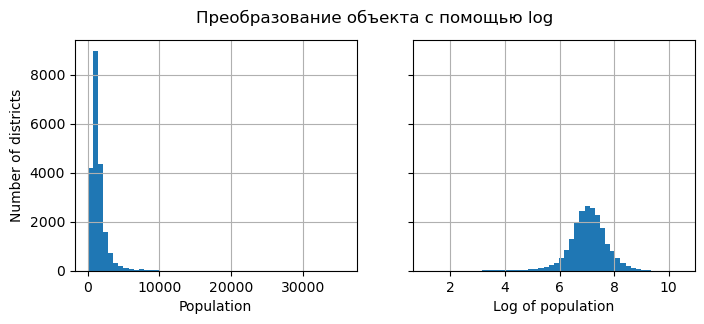

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
housing["population"].hist(ax=axs[0], bins=50)
housing["population"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Population")
axs[1].set_xlabel("Log of population")
axs[0].set_ylabel("Number of districts")
plt.suptitle('Преобразование объекта c помощью log')
plt.show()

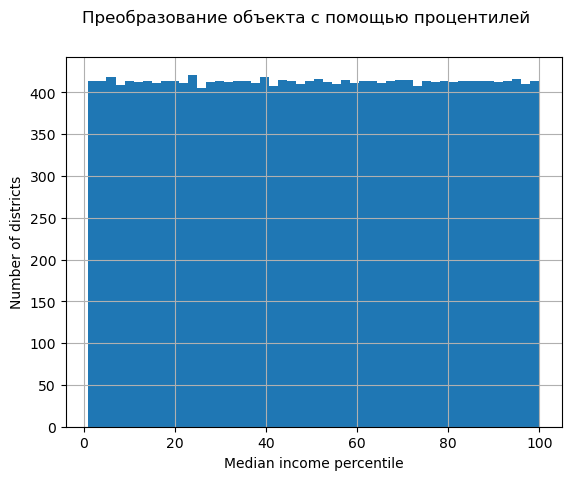

In [36]:
percentiles = [np.percentile(housing["median_income"], p)
               for p in range(1, 100)]
flattened_median_income = pd.cut(housing["median_income"],
                                 bins=[-np.inf] + percentiles + [np.inf],
                                 labels=range(1, 100 + 1))
flattened_median_income.hist(bins=50)
plt.xlabel("Median income percentile")
plt.ylabel("Number of districts")
plt.suptitle('Преобразование объекта с помощью процентилей')
plt.show()
# Примечание: доходы ниже 1-го процентиля отмечены цифрой 1, а доходы выше
# 99-й процентиль помечен как 100. Вот почему приведенное ниже распределение колеблется
# от 1 до 100 (не от 0 до 100).

Другой подход к преобразованию мультимодальных распределений заключается в добавлении признака для каждого из режимов (по крайней мере, основных), отражающего сходство между медианным возрастом жилья и этим конкретным режимом. Мера сходства обычно вычисляется с использованием функции радиального базиса (RBF) — любой функции, которая зависит только от расстояния между входным значением и фиксированной точкой. 

In [37]:
from sklearn.metrics.pairwise import rbf_kernel 
 
age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1) 

<AxesSubplot:>

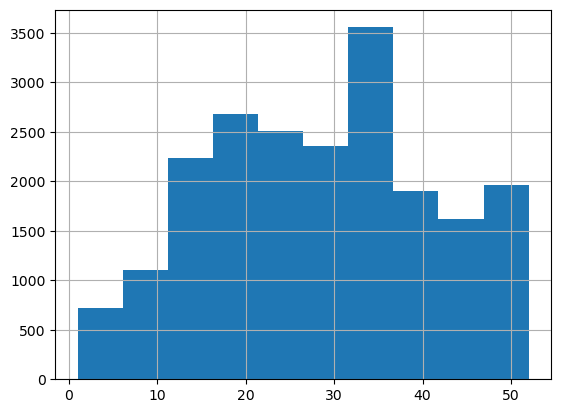

In [38]:
housing["housing_median_age"].hist()

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

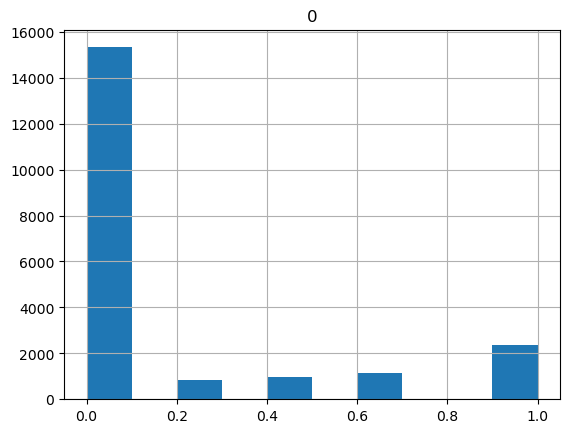

In [39]:
pd.DataFrame(age_simil_35).hist()

Также можно преобразовать целевой признак, для этого используется оценщик TransformedTargetRegressor.  Нам просто нужно построить его, дав ему регрессионную модель и преобразователь меток, а затем подогнать его к обучающему набору, используя исходные немасштабированные метки. Он будет автоматически использовать преобразователь для масштабирования меток и обучения регрессионной модели на полученных масштабированных метках, когда мы хотим сделать прогноз, он вызывает predict()метод регрессионной модели и использует метод масштабирования inverse_transform()для получения прогноза: 

In [40]:
some_new_data = housing[["median_income"]].iloc[:5] # допустим, это новые данные

In [41]:
from sklearn.compose import TransformedTargetRegressor 
from sklearn.linear_model import LinearRegression
 
model = TransformedTargetRegressor(LinearRegression(), 
                                   transformer=StandardScaler()) 
model.fit(housing[["median_income"]], y) 
predictions = model.predict(some_new_data) 
predictions

array([393027.73007889, 392033.03646789, 348400.25790111, 280932.44713449,
       205833.0795036 ])

## Пользовательские функции

Давайте создадим логарифмический преобразователь и применим его к population функции: 

In [42]:
from sklearn.preprocessing import FunctionTransformer 
 
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp) 
log_pop = log_transformer.transform(housing[["population"]]) 
# Аргумент inverse_func является необязательным. Он позволяет 
# указать функцию обратного преобразования, например, если вы планируете использовать преобразователь в файле TransformedTargetRegressor. 

Coздадим преобразователь, который вычисляет ту же меру подобия Гаусса RBF:

In [43]:
rbf_transformer = FunctionTransformer(rbf_kernel, 
                                      kw_args=dict(Y=[[35.]], gamma=0.1)) 
age_simil_35 = rbf_transformer.transform(housing[["housing_median_age"]]) 

обратите внимание, что rbf_kernel()функции не рассматриваются отдельно. Если вы передадите ему массив с двумя функциями, он будет измерять двумерное расстояние (евклидово) для измерения сходства. Например, вот как добавить функцию, которая будет измерять географическое сходство между каждым районом и Сан-Франциско: 

In [44]:
sf_coords = 37.7749, -122.41 
sf_transformer = FunctionTransformer(rbf_kernel, 
                                     kw_args=dict(Y=[sf_coords], gamma=0.1)) 
sf_simil = sf_transformer.transform(housing[["latitude", "longitude"]]) 

Пользовательские преобразователи также полезны для объединения функций. Например, вот FunctionTransformer вычисление отношения между входными функциями 0 и 1: 

In [45]:
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]]) 
ratio_transformer.transform(np.array([[1., 2.], [3., 4.]])) 


array([[0.5 ],
       [0.75]])

## Пользовательский класс

Следующий код демонстрирует пример пользовательского класса, который использует кластеризатор KMeansв fit() методе для определения основных кластеров в обучающих данных, а затем использует rbf_kernel() в transform() методе для измерения того, насколько каждый образец похож на каждый центр кластера:

In [46]:
from sklearn.base import BaseEstimator, TransformerMixin #BaseEstimator - базовый класс для всех оценщиков, TransformerMixin - класс Mixin для всех трансформеров в scikit-learn.
from sklearn.cluster import KMeans # кластеризация К-средних
 
class ClusterSimilarity(BaseEstimator, TransformerMixin): #создание собственного класса
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None): #задаются параметры конструктора
        self.n_clusters = n_clusters 
        self.gamma = gamma 
        self.random_state = random_state 
 
    def fit(self, X, y=None, sample_weight=None): # необязательный аргумент sample_weight, который позволяет пользователю указать относительный вес выборок
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)  # если вы хотите получить воспроизводимые результаты, вы должны установить random_state параметр.
        self.kmeans_.fit(X, sample_weight=sample_weight) 
        return self  # всегда возвращаем self! 
 
    def transform(self, X): 
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma) # После обучения центры кластеров доступны через cluster_centers_ атрибут
 
    def get_feature_names_out(self, names=None): 
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)] 

Теперь используем этот пользовательсикй класс:

In [47]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42) 
similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]], 
                                           sample_weight=y) 

Этот код создает ClusterSimilarity преобразователь, устанавливая количество кластеров равным 10. Затем он вызывает fit_transform()широту и долготу каждого района в обучающем наборе, взвешивая каждый район по его средней стоимости дома. Преобразователь использует k -средних для определения местоположения кластеров, а затем измеряет сходство гауссовой RBF между каждым районом и всеми 10 центрами кластеров. Результатом является матрица с одной строкой на район и одним столбцом на кластер. Посмотрим на первые три строки, округлив до двух знаков после запятой: 

In [48]:
similarities[:3].round(2)

array([[0.  , 0.23, 0.  , 0.  , 0.64, 0.  , 0.  , 0.  , 0.14, 0.99],
       [0.  , 0.24, 0.  , 0.  , 0.66, 0.  , 0.  , 0.  , 0.14, 0.98],
       [0.  , 0.22, 0.  , 0.  , 0.66, 0.  , 0.  , 0.  , 0.13, 0.99]])

## Конвейеры трансформации

Для последовательных преобразований данных в skicit learning есть специальный класс make_pipeline()

In [49]:
from sklearn.pipeline import make_pipeline 
 
num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
housing_num_prepared = num_pipeline.fit_transform(housing_num) 
housing_num_prepared[:2].round(2) 

array([[-1.33,  1.05,  0.98, -0.8 , -0.97, -0.97, -0.98,  2.34,  0.63,
        -1.15, -0.05],
       [-1.32,  1.04, -0.61,  2.05,  1.36,  0.86,  1.67,  2.33,  0.33,
        -0.99, -0.09]])

Восстановить DataFrame можно методом конвейера get_feature_names_out(): 

In [50]:
df_housing_num_prepared = pd.DataFrame( 
    housing_num_prepared, columns=num_pipeline.get_feature_names_out(), 
    index=housing_num.index) 

До сих пор мы обрабатывали категориальные столбцы и числовые столбцы отдельно. Было бы удобнее иметь один преобразователь, способный обрабатывать все столбцы, применяя соответствующие преобразования к каждому столбцу. Для этого вы можете использовать ColumnTransformer. Например, следующее (тот, который мы только что определили) ColumnTransformer будет применяться num_pipeline к числовым атрибутам и cat_pipeline к категориальному атрибуту: 

In [51]:
from sklearn.compose import ColumnTransformer 
#определяем числовые и категориальные признаки 
num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms", 
               "total_bedrooms", "population", "households", "median_income"] 
cat_attribs = ["ocean_proximity"] 
 
cat_pipeline = make_pipeline( 
    SimpleImputer(strategy="most_frequent"), 
    OneHotEncoder(handle_unknown="ignore")) #когда во время преобразования встречается неизвестная категория, результирующие столбцы
#с горячим кодированием для этой функции будут содержать все нули. В обратном преобразовании неизвестная категория будет обозначаться как None.
 
preprocessing = ColumnTransformer([ 
    ("num", num_pipeline, num_attribs), 
    ("cat", cat_pipeline, cat_attribs), 
]) # строим файл ColumnTransformer. 
#Его конструктору требуется список триплетов (трех кортежей), каждый из которых содержит имя (которое должно быть уникальным и не содержать двойных подчеркиваний), 
# преобразователь и список имен (или индексов) столбцов, к которым должен применяться преобразователь.  

Вместо использования преобразователя вы можете указать строку, "drop" если хотите, чтобы столбцы были удалены, или вы можете указать, "passthrough" хотите ли вы, чтобы столбцы оставались нетронутыми. По умолчанию оставшиеся столбцы (то есть те, которые не были перечислены) будут удалены, но вы можете установить гиперпараметр remainder на любой преобразователь (или на "passthrough"), если хотите, чтобы эти столбцы обрабатывались по-другому. 

Поскольку перечисление всех имен столбцов не очень удобно, Scikit-Learn предоставляет функцию make_column_selector(), которая возвращает функцию выбора, которую вы можете использовать для автоматического выбора всех функций данного типа, таких как числовые или категориальные. Более того, если вы не заботитесь об именах преобразователей, вы можете использовать make_column_transformer(), который выбирает имена за вас, как make_pipeline()это делает . 

In [52]:
from sklearn.compose import make_column_selector, make_column_transformer 
 
preprocessing = make_column_transformer( 
    (num_pipeline, make_column_selector(dtype_include=np.number)), 
    (cat_pipeline, make_column_selector(dtype_include=object)), 
) 

Теперь мы готовы применить это ColumnTransformer к данным о жилье: 

In [53]:
housing_prepared = preprocessing.fit_transform(housing) 

Возвращает OneHotEncoder разреженную матрицу, а возвращает num_pipeline плотную матрицу. При наличии такого сочетания разреженных и плотных матриц функция ColumnTransformer оценивает плотность конечной матрицы (т. е. соотношение ненулевых ячеек) и возвращает разреженную матрицу, если плотность ниже заданного порога (по умолчанию sparse_threshold=0.3) . В этом примере он возвращает плотную матрицу. 

## Cоздание единого конвейера

Давайте вспомним, что будет делать конвейер и почему: 

- Пропущенные значения в числовых характеристиках будут заменены медианой, поскольку большинство алгоритмов ML не ожидают пропущенных значений. В категориальных функциях отсутствующие значения будут заменены наиболее часто встречающейся категорией. 

- Категориальная функция будет закодирована сразу, так как большинство алгоритмов ML принимают только числовые входные данные. 

- Будут вычислены и добавлены несколько функций соотношения: bedrooms_ratio, rooms_per_house, и people_per_house. Надеемся, что они будут лучше коррелировать со средней стоимостью дома и, таким образом, помогут моделям машинного обучения. 

- Также будут добавлены несколько функций сходства кластеров. Вероятно, они будут более полезными для модели, чем широта и долгота. 

- Признаки с длинным хвостом будут заменены их логарифмами, поскольку большинство моделей предпочитают признаки с примерно равномерным или гауссовым распределением. 

- Все числовые признаки будут стандартизированы, так как большинство алгоритмов машинного обучения предпочитают, чтобы все признаки имели примерно одинаковый масштаб. 

Код, который строит конвейер для всего этого, должен показаться вам уже знакомым: 

In [54]:
def column_ratio(X): 
    return X[:, [0]] / X[:, [1]] # функции соотношения
 
def ratio_name(function_transformer, feature_names_in): 
    return ["ratio"]  # названия функций
 
def ratio_pipeline(): 
    return make_pipeline( 
        SimpleImputer(strategy="median"), 
        FunctionTransformer(column_ratio, feature_names_out=ratio_name), 
        StandardScaler()) # создаем конвейер трансформации для новых столбцов
 
log_pipeline = make_pipeline( 
    SimpleImputer(strategy="median"), 
    FunctionTransformer(np.log, feature_names_out="one-to-one"), 
    StandardScaler()) # преобразовываем данные с длинным хвостом
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42) #применяем собственный класс для определения 10 кластеров
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"), #конвейер для оставшихся числовых признаков
                                     StandardScaler()) 
preprocessing = ColumnTransformer([ #CОЗДАЕМ ЕДИНЫЙ КОНВЕЙЕР ТРАНСФОРМАЦИИ
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]), 
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]), 
        ("people_per_house", ratio_pipeline(), ["population", "households"]), 
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population", 
                               "households", "median_income"]), 
        ("geo", cluster_simil, ["latitude", "longitude"]), 
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)), 
    ], 
    remainder=default_num_pipeline)  # remainder - гиперпараметр, позволяющий обрабатывать столбцы отдельно от перечисленных

Если вы запустите это ColumnTransformer, он выполнит все преобразования и выведет массив NumPy с 24 функциями: 

In [55]:
housing_prepared = preprocessing.fit_transform(housing) 
print(housing_prepared.shape)
print(preprocessing.get_feature_names_out())

(20640, 27)
['bedrooms__ratio' 'rooms_per_house__ratio' 'people_per_house__ratio'
 'log__total_bedrooms' 'log__total_rooms' 'log__population'
 'log__households' 'log__median_income' 'geo__Cluster 0 similarity'
 'geo__Cluster 1 similarity' 'geo__Cluster 2 similarity'
 'geo__Cluster 3 similarity' 'geo__Cluster 4 similarity'
 'geo__Cluster 5 similarity' 'geo__Cluster 6 similarity'
 'geo__Cluster 7 similarity' 'geo__Cluster 8 similarity'
 'geo__Cluster 9 similarity' 'cat__ocean_proximity_<1H OCEAN'
 'cat__ocean_proximity_INLAND' 'cat__ocean_proximity_ISLAND'
 'cat__ocean_proximity_NEAR BAY' 'cat__ocean_proximity_NEAR OCEAN'
 'remainder__housing_median_age' 'remainder__rooms_per_house'
 'remainder__bedrooms_ratio' 'remainder__people_per_house']


# Моделирование

Обучем модель Линейной регрессии:

In [56]:
from sklearn.linear_model import LinearRegression 
 
lin_reg = make_pipeline(preprocessing, LinearRegression()) 
lin_reg.fit(X_train, y_train) 

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002669275F1F0>)])),
                ('linearregression', LinearRegression())])

In [57]:
housing_predictions = lin_reg.predict(X_test)

In [58]:
housing_predictions[:5].round(2)

array([363920., 268752., 367120., 294512., 292112.])

In [59]:
y_test[:5].values

array([397700., 202900., 310000., 314300., 187500.])

In [60]:
error = y_test - housing_predictions
error[:5].values

array([  33780.,  -65852.,  -57120.,   19788., -104612.])

Измерим RMSE

In [61]:
from sklearn.metrics import mean_squared_error 
lin_rmse = mean_squared_error(y_test, housing_predictions, 
                              squared=False)  
lin_rmse

74814.15305607826

Это пример модели, которая не соответствует обучающим данным. Когда это происходит, это может означать, что функции не предоставляют достаточно информации для хороших прогнозов или что модель недостаточно мощная.

Обучем другую модель - Дерево решений:

In [62]:
from sklearn.tree import DecisionTreeRegressor 
 
tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42)) 
tree_reg.fit(X_train, y_train) 

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002669275F1F0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [63]:
housing_predictions = tree_reg.predict(X_test) 
tree_rmse = mean_squared_error(y_test, housing_predictions, 
                              squared=False) 
 
tree_rmse

65630.622951701

## Перекрестная проверка

In [64]:
from sklearn.model_selection import cross_val_score 
 
tree_rmses = -cross_val_score(tree_reg, X_train, y_train, 
                              scoring="neg_root_mean_squared_error", cv=10) 

Функции перекрестной проверки Scikit-Learn предполагают функцию полезности (чем больше, тем лучше), а не функцию затрат (чем меньше, тем лучше), поэтому функция оценки фактически является противоположностью RMSE. Это отрицательное значение, поэтому вам нужно переключить знак вывода, чтобы получить оценки RMSE. 

In [66]:
pd.Series(tree_rmses).describe() #cтандартное отклонение в данном случае - мера точности

count       10.000000
mean     67001.544781
std       2249.910849
min      64278.643035
25%      65386.617808
50%      66395.860394
75%      68276.558655
max      71361.232791
dtype: float64

Теперь дерево решений выглядит не так хорошо, как раньше. На самом деле, кажется, что модель работает почти так же плохо, как и модель линейной регрессии! Давайте попробуем последнюю модель:. RandomForestRegressor

In [67]:
from sklearn.ensemble import RandomForestRegressor 
 
forest_reg = make_pipeline(preprocessing, 
                           RandomForestRegressor(random_state=42)) 
forest_rmses = -cross_val_score(forest_reg, X_train, y_train, 
                                scoring="neg_root_mean_squared_error", cv=10) 

In [68]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     47032.384109
std       1003.082277
min      45631.245160
25%      46523.830991
50%      46915.636751
75%      47292.615527
max      49273.936990
dtype: float64

## Перебор гиперпараметров по сетке

In [71]:
from sklearn.model_selection import GridSearchCV 
from sklearn.pipeline import Pipeline
 
full_pipeline = Pipeline([ 
    ("preprocessing", preprocessing), 
    ("random_forest", RandomForestRegressor(random_state=42)), 
]) 
param_grid = [ 
    {'preprocessing__geo__n_clusters': [5, 8, 10], 
     'random_forest__max_features': [4, 6, 8]}, 
    {'preprocessing__geo__n_clusters': [10, 15], 
     'random_forest__max_features': [6, 8, 10]}, 
] 
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3, 
                           scoring='neg_root_mean_squared_error') 

grid_search.fit(X_train, y_train) 

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000002669275F1F0>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

Обратите внимание, что вы можете ссылаться на любой гиперпараметр любого оценщика в конвейере, даже если этот оценщик глубоко вложен в несколько конвейеров и преобразователей столбцов. Например, когда Scikit-Learn видит "preprocessing__geo__n_clusters", он разбивает эту строку по двойным символам подчеркивания, затем ищет оценщик с именем "preprocessing" в конвейере и находит предварительную обработку ColumnTransformer. Затем он ищет преобразователь с именем "geo" внутри этого ColumnTransformerи находит ClusterSimilarity преобразователь, который мы использовали для атрибутов широты и долготы. Затем он находит гиперпараметр этого преобразователя n_clusters. Точно так же random_forest__max_features относится к max_features гиперпараметру оценщика с именем "random_forest", который, конечно же, является RandomForest моделью.

In [75]:
grid_search.best_params_ # лучшие параметры

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

In [76]:
grid_search.best_estimator_ # лучшая модель

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x0000026...
                                                  ClusterSimilarity(n_clusters=15,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000266929B1AF0>)])),
                ('random_forest',
                 RandomForestRegressor(max_features=6, random_state=42))])

In [78]:
#grid_search.cv_results_ #оценочные баллы

Это словарь, но если вы поместите его в DataFrame, вы получите хороший список всех результатов тестов для каждой комбинации гиперпараметров и для каждого разделения перекрестной проверки, а также средний результат теста по всем разделениям: 

In [81]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
12,3.980324,0.025506,0.124844,0.006224,15,6,"{'preprocessing__geo__n_clusters': 15, 'random...",-44167.822923,-44447.276323,-45622.966734,-44746.021993,630.501181,1
13,4.976596,0.026143,0.125898,0.006685,15,8,"{'preprocessing__geo__n_clusters': 15, 'random...",-44573.933160,-44595.884342,-45881.024129,-45016.947210,611.060365,2
14,5.990153,0.062013,0.141778,0.007587,15,10,"{'preprocessing__geo__n_clusters': 15, 'random...",-45018.269642,-44942.938095,-46145.783675,-45368.997137,550.131320,3
7,3.997345,0.058677,0.136567,0.005372,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-45801.687750,-45765.371532,-46642.293521,-46069.784268,405.096573,4
9,3.960567,0.020733,0.134697,0.003811,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-45801.687750,-45765.371532,-46642.293521,-46069.784268,405.096573,4
8,4.922228,0.035087,0.129422,0.003984,10,8,"{'preprocessing__geo__n_clusters': 10, 'random...",-45811.022413,-45904.401095,-46938.851428,-46218.091645,511.077876,6
10,5.050350,0.163942,0.136224,0.006510,10,8,"{'preprocessing__geo__n_clusters': 10, 'random...",-45811.022413,-45904.401095,-46938.851428,-46218.091645,511.077876,6
6,2.951269,0.006798,0.122068,0.003060,10,4,"{'preprocessing__geo__n_clusters': 10, 'random...",-45912.753575,-45716.614152,-47113.086747,-46247.484825,617.288525,8
4,3.857586,0.008390,0.119306,0.001768,8,6,"{'preprocessing__geo__n_clusters': 8, 'random_...",-45835.186458,-46097.727366,-47260.033183,-46397.649002,619.145534,9
11,5.882465,0.063303,0.137780,0.010570,10,10,"{'preprocessing__geo__n_clusters': 10, 'random...",-45869.154867,-46065.947315,-47333.120687,-46422.740956,648.729660,10


## Рондомизированный подбор гиперпараметров по сетке

Поиск по сетке - подход удобен, когда вы изучаете относительно небольшое количество комбинаций, как в предыдущем примере, но RandomizedSearchCV часто предпочтительнее, особенно когда пространство поиска гиперпараметров велико.

In [82]:
from sklearn.model_selection import RandomizedSearchCV 
from scipy.stats import randint #Равномерная дискретная случайная величина
 
param_distribs = {'preprocessing__geo__n_clusters': randint(low=3, high=50), 
                  'random_forest__max_features': randint(low=2, high=20)} 
 
rnd_search = RandomizedSearchCV( 
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3, #в рандомном поиске мы сами задаем кол-во вариантов перебора гиперпараметров, 
                                                                         #то есть итераций
    scoring='neg_root_mean_squared_error', random_state=42) 
 
rnd_search.fit(X_train, y_train) 

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000266961A8220>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000026692B2E880>},
                   random_state=42, scoring='neg_root_mean_squared_error')

## Важность признаков

In [83]:
final_model = rnd_search.best_estimator_
feature_importances = final_model["random_forest"].feature_importances_ 
feature_importances.round(2) 


array([0.05, 0.04, 0.04, 0.01, 0.01, 0.01, 0.01, 0.17, 0.03, 0.01, 0.  ,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.01, 0.01, 0.01, 0.  , 0.01,
       0.  , 0.01, 0.01, 0.01, 0.01, 0.  , 0.02, 0.01, 0.01, 0.01, 0.03,
       0.01, 0.  , 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.01, 0.  , 0.07,
       0.  , 0.  , 0.  , 0.01, 0.03, 0.04, 0.04])

In [84]:
sorted(zip(feature_importances, 
           final_model["preprocessing"].get_feature_names_out()), 
          reverse=True)

[(0.17299362588757775, 'log__median_income'),
 (0.07178279317535693, 'cat__ocean_proximity_INLAND'),
 (0.0475364554740168, 'bedrooms__ratio'),
 (0.04404635591787609, 'remainder__bedrooms_ratio'),
 (0.03890137453909414, 'remainder__people_per_house'),
 (0.03873884862740817, 'rooms_per_house__ratio'),
 (0.03745556199524362, 'people_per_house__ratio'),
 (0.033701831323062016, 'remainder__rooms_per_house'),
 (0.02764508381891734, 'geo__Cluster 0 similarity'),
 (0.027135302816704197, 'geo__Cluster 24 similarity'),
 (0.020101133918495814, 'geo__Cluster 28 similarity'),
 (0.019351504923992898, 'geo__Cluster 20 similarity'),
 (0.01750482042190248, 'geo__Cluster 43 similarity'),
 (0.01721304827935808, 'geo__Cluster 34 similarity'),
 (0.016988843054203413, 'geo__Cluster 27 similarity'),
 (0.014359999810498356, 'geo__Cluster 37 similarity'),
 (0.014255033575561508, 'geo__Cluster 38 similarity'),
 (0.01347044103128443, 'geo__Cluster 4 similarity'),
 (0.013046468986104754, 'geo__Cluster 3 similarit

Имея эту информацию, вы можете попробовать отказаться от некоторых менее полезных функций (например, очевидно, что только одна ocean_proximity категория действительно полезна, поэтому вы можете попробовать отказаться от других). 

Метатрансформатор для выбора признаков на основе весов важности - sklearn.feature_selection.SelectFromModel !!!

# Оценка на тестовом наборе

In [85]:
final_predictions = final_model.predict(X_test)
final_rmse = mean_squared_error(y_test, final_predictions, squared=False) 
print(final_rmse)

41856.975155187145


 В некоторых случаях такой точечной оценки ошибки обобщения будет недостаточно, чтобы убедить вас в необходимости запуска: что, если она всего на 0,1% лучше, чем модель, которая сейчас находится в производстве? Возможно, вы захотите иметь представление о том, насколько точна эта оценка. Для этого вы можете вычислить 95% доверительный интервал для ошибки обобщения, используя scipy.stats.t.interval(). Вы получаете довольно большой интервал от 39 721 до 43 888, и ваша предыдущая точечная оценка 41856 находится примерно посередине: 

In [87]:
from scipy import stats 
confidence = 0.95 
squared_errors = (final_predictions - y_test) ** 2 
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, 
                       loc=squared_errors.mean(), 
                        scale=stats.sem(squared_errors)))

array([39721.34170624, 43888.81123179])

## Запуск модели

Чтобы сохранить модель, вы можете использовать joblib библиотеку следующим образом:

In [88]:
import joblib 
 
joblib.dump(final_model, "my_california_housing_model.pkl") 

['my_california_housing_model.pkl']

Как только ваша модель будет передана в производство, вы можете загрузить ее и использовать. Для этого вы должны сначала импортировать любые пользовательские классы и функции, на которые опирается модель (что означает передачу кода в производство), а затем загрузить модель joblib и использовать ее для прогнозирования: 

In [90]:
import joblib

# extra code – excluded for conciseness
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

#class ClusterSimilarity(BaseEstimator, TransformerMixin):
#    [...]

final_model_reloaded = joblib.load("my_california_housing_model.pkl")

new_data = housing.iloc[:5]  # pretend these are new districts
predictions = final_model_reloaded.predict(new_data)

Другой популярной стратегией является развертывание вашей модели в облаке, например, на Google Vertex AI (ранее известная как Google Cloud AI Platform и Google Cloud ML Engine): просто сохраните свою модель с помощью joblib и загрузите ее в Google Cloud Storage (GCS), затем перейдите в Vertex AI и создайте новую версию модели, указав ее на файл ГКС

# Упражнения

1. Попробуйте добавить SelectFromModel преобразователь в конвейер подготовки, чтобы выбрать только самые важные атрибуты:

In [91]:
from sklearn.feature_selection import SelectFromModel

In [92]:
selector_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('selector', SelectFromModel(RandomForestRegressor(random_state=42),
                                 threshold=0.005)),  # минимальная важность признака
    ("random_forest", RandomForestRegressor(random_state=42,  max_features=6))])

In [93]:
selector_rmses = -cross_val_score(selector_pipeline,
                                  X_train,
                                  y_train,
                                  scoring="neg_root_mean_squared_error",
                                  cv=3)
pd.Series(selector_rmses).describe()

count        3.000000
mean     46190.706580
std        608.117447
min      45677.751942
25%      45854.823402
50%      46031.894862
75%      46447.183899
max      46862.472936
dtype: float64

2. Cоздадим преобразователь, который принимает любой регрессор. Для этого мы можем расширить MetaEstimatorMixin и иметь в конструкторе обязательный аргумент оценщика. Метод fit() должен работать с клоном этого оценщика, а также сохранять feature_names_in_. MetaEstimatorMixin гарантирует, что оценщик указан в качестве обязательных параметров, и обновит get_params() и set_params(), чтобы сделать гиперпараметры оценщика доступными для настройки. Наконец, мы создаем метод get_feature_names_out(): имя выходного столбца 

In [96]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.base import MetaEstimatorMixin, clone
from sklearn.utils.validation import check_is_fitted

class FeatureFromRegressor(MetaEstimatorMixin, BaseEstimator, TransformerMixin):
    def __init__(self, estimator):
        self.estimator = estimator

    def fit(self, X, y=None):
        estimator_ = clone(self.estimator)
        estimator_.fit(X, y)
        self.estimator_ = estimator_
        self.n_features_in_ = self.estimator_.n_features_in_
        if hasattr(self.estimator, "feature_names_in_"):
            self.feature_names_in_ = self.estimator.feature_names_in_
        return self  #всегда возвращаем self!
    
    def transform(self, X):
        check_is_fitted(self)
        predictions = self.estimator_.predict(X)
        if predictions.ndim == 1:
            predictions = predictions.reshape(-1, 1)
        return predictions

    def get_feature_names_out(self, names=None):
        check_is_fitted(self)
        n_outputs = getattr(self.estimator_, "n_outputs_", 1)
        estimator_class_name = self.estimator_.__class__.__name__
        estimator_short_name = estimator_class_name.lower().replace("_", "")
        return [f"{estimator_short_name}_prediction_{i}"
                for i in range(n_outputs)]

In [97]:
from sklearn.utils.estimator_checks import check_estimator

check_estimator(FeatureFromRegressor(KNeighborsRegressor()))

In [98]:
knn_reg = KNeighborsRegressor(n_neighbors=3, weights="distance")
knn_transformer = FeatureFromRegressor(knn_reg)
geo_features = X_train[["latitude", "longitude"]]
knn_transformer.fit_transform(geo_features, y_train)

array([[486100.66666667],
       [435250.        ],
       [105100.        ],
       ...,
       [148800.        ],
       [500001.        ],
       [234333.33333333]])

In [99]:
knn_transformer.get_feature_names_out()

['kneighborsregressor_prediction_0']

In [100]:
transformers = [(name, clone(transformer), columns)
                for name, transformer, columns in preprocessing.transformers]
geo_index = [name for name, _, _ in transformers].index("geo")
transformers[geo_index] = ("geo", knn_transformer, ["latitude", "longitude"])

new_geo_preprocessing = ColumnTransformer(transformers)

In [102]:
new_geo_pipeline = Pipeline([
    ('preprocessing', new_geo_preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42,  max_features=6))
])

In [104]:
new_pipe_rmses = -cross_val_score(new_geo_pipeline,
                                  X_train,
                                  y_train,
                                  scoring="neg_root_mean_squared_error",
                                  cv=3)
pd.Series(new_pipe_rmses).describe()

count        3.000000
mean     52812.683554
std        976.550350
min      51690.014637
25%      52486.295806
50%      53282.576974
75%      53374.018013
max      53465.459051
dtype: float64